In [1]:
from djccx.frd.readfrd import readfrd



In [2]:
ifrd = readfrd("output/main.frd")

In [3]:
from matplotlib import pyplot as plt

In [4]:
data = ifrd["data"]

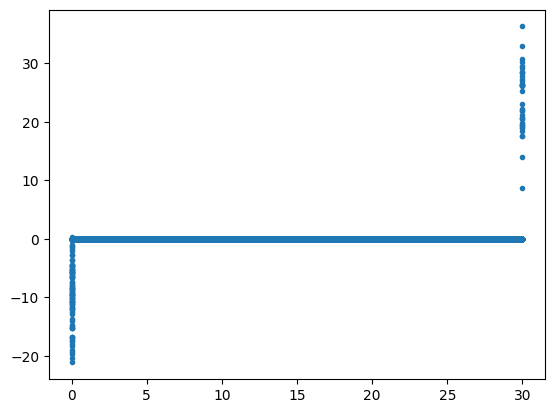

In [5]:
plt.plot(data["x"], data["F3"],".")

In [6]:
F3 = data["F3"][data["x"]< data["x"].mean()]
P = -4*F3.sum()
B = 25
L = 60
tn  = 2.934
tl = 0.475
t = tn + 4*tl
U = 5

In [7]:

Eflex = (P*L**3)/(4*U*B*t**3) * 1e-3

In [8]:
print("Eflex = ", Eflex)

Eflex =  13.525285339463087


In [9]:
import numpy as np

In [10]:
# cilindro
Ly = 25
Lx = 60
tn  = 2.934
tl = 0.475
r  = 3*tl/8
d  = 0.74297
A = np.pi*r**2



R = 10/6
nx_fibres = 3


z0 = tn/2
dx = 0.1 
dz = 0.1


hx = R
hz = tl
Lz = 2*2*hz + 2*z0 

yspan = np.arange(0, Ly/2 - hx, hx)
yspan = yspan + hx/2

FP1_list = []
FM1_list = []
FP2_list = []
FM2_list = []

trajs = []
for iy in yspan:
    
    # x in [ 0, nx_fibres*hx]
    xspan = np.linspace(0, nx_fibres*hx, 50)
    yspan = np.zeros_like(xspan) + iy
    zspan = np.zeros_like(xspan) - z0 - hz/2
    itraj = np.array([xspan, yspan, zspan]).T
    trajs.append(itraj)
    
    zspan = np.zeros_like(xspan) - z0 - 3*hz/2
    itraj = np.array([xspan, yspan, zspan]).T
    trajs.append(itraj)

In [11]:
from matplotlib import pyplot as plt

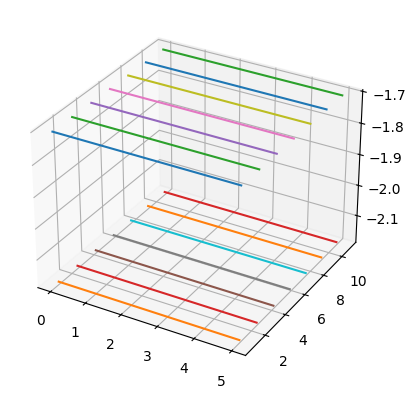

In [12]:
# plot the trajectories
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for traj in trajs:
    ax.plot(traj[:, 0], traj[:, 1], traj[:, 2], '-')

In [13]:
from scipy.interpolate import NearestNDInterpolator
from gmshtools.grid_section import grid_section


def compute_P1_max(data,idesign):

    x = data["x"]
    y = data["y"]
    z = data["z"]
    P1 = data["P1"]

    fcn = NearestNDInterpolator((x,y,z),P1)


    P1_mu_list = []
    P1_all = []
    for jj,jtrajs in enumerate(idesign):

        jtraj_diff = np.diff(jtrajs,axis=0)
        P1_mu_list_by = []
        for j in range(0,len(jtraj_diff),1):

            vec_z =  jtraj_diff[j]
            vec_z = vec_z/np.linalg.norm(vec_z)
            vec_x = np.cross(vec_z, [0,0,1])
            vec_x = vec_x/np.linalg.norm(vec_x)

            X,Y,Z = grid_section(jtrajs[j][0],
                                jtrajs[j][1],
                                jtrajs[j][2],
                                vec_z,
                                vec_x,
                                0.8*d,
                                0.8*r,
                                rho=150)
            P1 = fcn(X,Y,Z)
            P1_mu = np.max(P1)
            P1_mu_list_by.append(P1_mu)
            P1_mu_list.append(P1_mu)

        # ============================
        P1_mu_list_by = np.array(P1_mu_list_by)
        P1_all.append(P1_mu_list_by)
        
        # ============================
    P1_max = np.max(P1_mu_list)
    P1_all = np.array(P1_all)
    return P1_max,P1_all

In [14]:
from djccx.inp.inp import inp

Wine está instalado. Versión: wine-9.0
Wine is installed. Calculix will be run with windows binary


Authorization required, but no authorization protocol specified
Authorization required, but no authorization protocol specified
Authorization required, but no authorization protocol specified


In [15]:
inp_f = inp("output/main.inp")

In [16]:

P1_max_fibre,P1_all = compute_P1_max(ifrd["data_blocks"][0],trajs)



In [17]:
P1_all[0] = np.array(P1_all[0])


In [18]:
P1_all[0]

array([953.09507454, 952.43935046, 907.32776828, 905.09218631,
       905.84274221, 904.54027331, 902.12196358, 904.26604771,
       904.44930884, 902.72342256, 904.21612009, 903.85785376,
       901.07331303, 903.16914959, 903.20050453, 901.5854527 ,
       900.79235341, 897.44323124, 896.12426002, 894.13515065,
       893.38165393, 892.33628458, 891.7814787 , 890.22225387,
       888.06395372, 887.93816343, 886.03205566, 884.23526809,
       883.07205042, 883.60785695, 881.34886855, 878.85952164,
       875.440017  , 876.05760795, 874.1647594 , 871.43795593,
       868.52548766, 866.59344268, 863.30671951, 860.77321278,
       860.93740792, 858.27855053, 858.11408314, 858.73930871,
       863.08651389, 875.52115042, 898.50816721, 887.59446948,
       851.57330789])

In [19]:
len( P1_all[0])

49

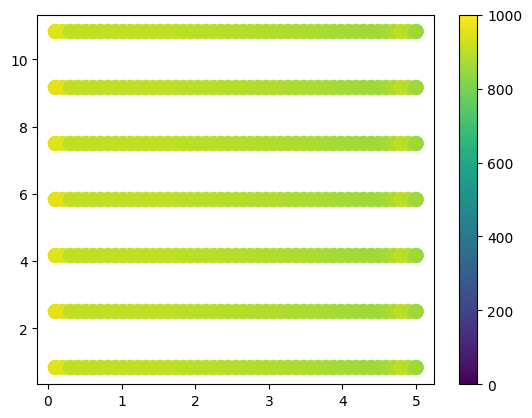

In [20]:
for itraj in trajs:
    plt.scatter(itraj[1:,0],
                itraj[1:,1], c= P1_all[0], s=100, cmap='viridis',vmax=1000,vmin=0)
    
plt.colorbar()

In [21]:
P1_max_fibre

np.float64(1551.3600282267319)

In [22]:
P1_all

array([[ 953.09507454,  952.43935046,  907.32776828,  905.09218631,
         905.84274221,  904.54027331,  902.12196358,  904.26604771,
         904.44930884,  902.72342256,  904.21612009,  903.85785376,
         901.07331303,  903.16914959,  903.20050453,  901.5854527 ,
         900.79235341,  897.44323124,  896.12426002,  894.13515065,
         893.38165393,  892.33628458,  891.7814787 ,  890.22225387,
         888.06395372,  887.93816343,  886.03205566,  884.23526809,
         883.07205042,  883.60785695,  881.34886855,  878.85952164,
         875.440017  ,  876.05760795,  874.1647594 ,  871.43795593,
         868.52548766,  866.59344268,  863.30671951,  860.77321278,
         860.93740792,  858.27855053,  858.11408314,  858.73930871,
         863.08651389,  875.52115042,  898.50816721,  887.59446948,
         851.57330789],
       [1547.48014904, 1547.58001001, 1497.93093267, 1495.96141349,
        1494.72186035, 1500.61588578, 1501.93768639, 1495.6894646 ,
        1482.67093067, 1

In [23]:
inp_f.cards

array([Card (*NODE) :*NODE, Card (*ELEMENT) :VOLUME1,
       Card (*ELEMENT) :VOLUME2, Card (*ELEMENT) :VOLUME3,
       Card (*ELEMENT) :VOLUME4, Card (*ELEMENT) :VOLUME5,
       Card (*ELEMENT) :VOLUME6, Card (*ELEMENT) :VOLUME7,
       Card (*ELEMENT) :VOLUME8, Card (*ELEMENT) :VOLUME9,
       Card (*ELEMENT) :VOLUME10, Card (*ELEMENT) :VOLUME11,
       Card (*ELEMENT) :VOLUME12, Card (*ELEMENT) :VOLUME13,
       Card (*ELEMENT) :VOLUME14, Card (*ELEMENT) :VOLUME15,
       Card (*ELEMENT) :VOLUME16, Card (*ELEMENT) :VOLUME17,
       Card (*ELEMENT) :VOLUME18, Card (*ELEMENT) :VOLUME19,
       Card (*ELEMENT) :VOLUME20, Card (*ELEMENT) :VOLUME21,
       Card (*ELEMENT) :VOLUME22, Card (*ELEMENT) :VOLUME23,
       Card (*ELEMENT) :VOLUME24, Card (*ELEMENT) :VOLUME25,
       Card (*ELEMENT) :VOLUME26, Card (*ELEMENT) :VOLUME27,
       Card (*ELEMENT) :VOLUME28, Card (*ELEMENT) :VOLUME31,
       Card (*ELEMENT) :VOLUME32, Card (*ELEMENT) :VOLUME33,
       Card (*ELEMENT) :VOLUME34, Card 

/tmp/ipykernel_3494514/2724511289.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  plt.scatter(data_cp["z"],data_cp["y"], s=0.1, cmap='viridis',vmax=1000,vmin=0)
/tmp/ipykernel_3494514/2724511289.py:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  plt.scatter(data_cp["x"],data_cp["y"], s=0.1, cmap='viridis',vmax=1000,vmin=0)


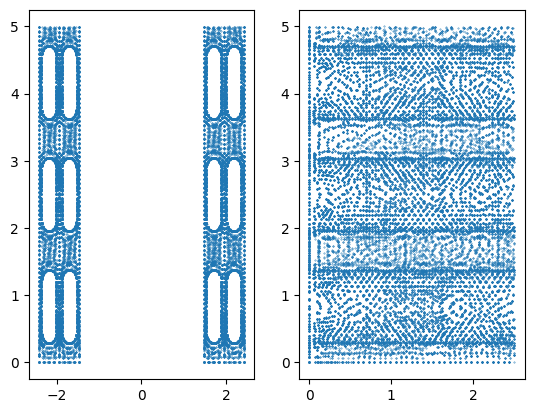

In [24]:
RESINA = inp_f.select("RESINA","elset")
df = RESINA.GetUniqueNodes(inp_f)
indx_frd = df.index.values

nodes_matrix = ifrd["data_blocks"][0].loc[indx_frd]
data_cp = nodes_matrix.copy()
# x in -2.5, 2.5
data_cp = data_cp[(data_cp["x"] > -2.5) & (data_cp["x"] < 2.5)]
# y in -5, 5
data_cp = data_cp[(data_cp["y"] > -5) & (data_cp["y"] < 5)]

id_max = np.argmax(data_cp["P1"])

P1_max = data_cp["P1"].iloc[id_max]
x_max = data_cp["x"].iloc[id_max]
y_max = data_cp["y"].iloc[id_max]
z_max = data_cp["z"].iloc[id_max]

dist = np.sqrt((x_max - nodes_matrix["x"])**2 + \
                (y_max - nodes_matrix["y"])**2 + \
                (z_max - nodes_matrix["z"])**2)
        
nodes_matrix = nodes_matrix[dist < 0.025]
P1_max_resina = np.mean(nodes_matrix["P1"])

# P1_max_resina = P1_max




# plot xz view scatter 
plt.subplot(121)
plt.scatter(data_cp["z"],data_cp["y"], s=0.1, cmap='viridis',vmax=1000,vmin=0)
plt.subplot(122)
plt.scatter(data_cp["x"],data_cp["y"], s=0.1, cmap='viridis',vmax=1000,vmin=0)
# ratio 


In [25]:
P1_max_resina_list = []
rr_list = np.linspace(0.001, 0.3, 15)
for rrr in rr_list:
    RESINA = inp_f.select("RESINA","elset")
    df = RESINA.GetUniqueNodes(inp_f)
    indx_frd = df.index.values

    nodes_matrix = ifrd["data_blocks"][0].loc[indx_frd]
    data_cp = nodes_matrix.copy()
    # x in -2.5, 2.5
    data_cp = data_cp[(data_cp["x"] > -2.5) & (data_cp["x"] < 2.5)]
    # y in -5, 5
    data_cp = data_cp[(data_cp["y"] > -5) & (data_cp["y"] < 5)]

    id_max = np.argmax(data_cp["P1"])

    P1_max = data_cp["P1"].iloc[id_max]
    x_max = data_cp["x"].iloc[id_max]
    y_max = data_cp["y"].iloc[id_max]
    z_max = data_cp["z"].iloc[id_max]

    dist = np.sqrt((x_max - nodes_matrix["x"])**2 + \
                    (y_max - nodes_matrix["y"])**2 + \
                    (z_max - nodes_matrix["z"])**2)
            
    nodes_matrix = nodes_matrix[dist < rrr]
    P1_max_resina_loop = np.mean(nodes_matrix["P1"])
    P1_max_resina_list.append(P1_max_resina_loop)
    




In [26]:
from loadsavejson.savejson import savejson

savejson({
    "P1_max": P1_max_fibre,
    "Eflex": Eflex,
    "P1_all": P1_max_fibre,
    "P1_max_resina": P1_max_resina,
    "position": [x_max,y_max,z_max],
    "P1_max_resina_list": P1_max_resina_list,
    "rr_list": rr_list.tolist(),
    "rrr": 0.05,
}, "P1.json")